# BME3508 – Module 2 Lecture 4





In [15]:
import numpy as np
import matplotlib.pyplot as plt

def periodic_exp_decay(t):
    """Generate periodic exponential decay signal"""
    # Normalize t to [-2π, 2π]
    t_norm = t % (2*np.pi)
    if t_norm > np.pi:
        t_norm -= np.pi
    
    # Calculate exponential decay
    return np.exp(-t_norm/2)

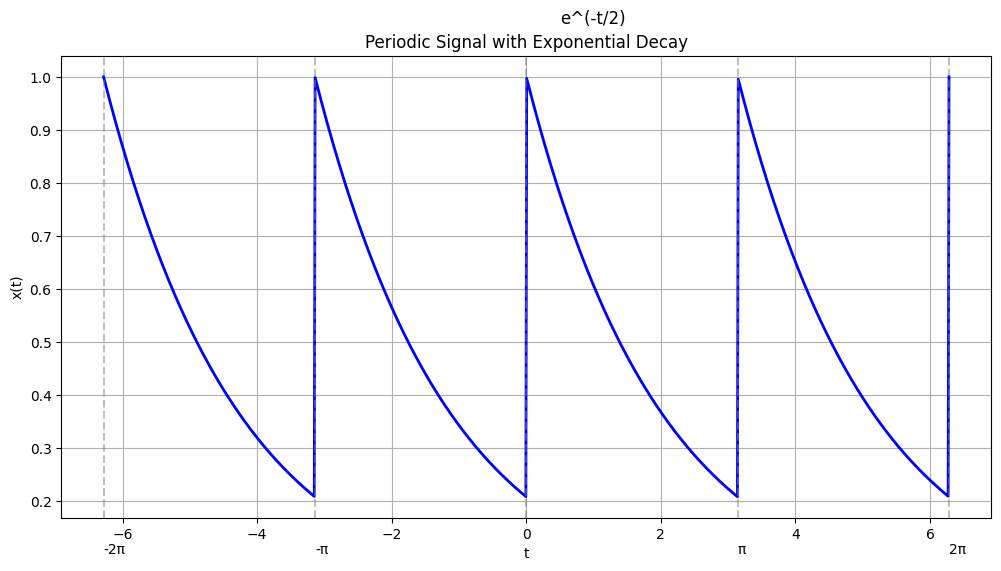

In [34]:
# Generate time points
t = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Calculate signal values
x = np.array([periodic_exp_decay(ti) for ti in t])

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b-', linewidth=2)

# Add vertical lines at discontinuities
for ti in [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]:
    plt.axvline(x=ti, color='gray', linestyle='--', alpha=0.5)

# Add labels and grid
plt.grid(True)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Periodic Signal with Exponential Decay')

# Add text annotations
y_offset=-0.1
plt.text(-2*np.pi, -y_offset, '-2π')
plt.text(-np.pi, -y_offset, '-π')
plt.text(np.pi, -y_offset, 'π')
plt.text(2*np.pi, -y_offset, '2π')
plt.text(0.5, 1.1, 'e^(-t/2)', fontsize=12)

plt.show()

# Fourier Series Derivation for a Periodic Exponentially Decaying Function

The given function is an **exponentially decaying function** that resets at each interval of \( T = \pi \). From the image, we assume the function is:

$$
x(t) = e^{-t/2}, \quad 0 \leq t < \pi
$$

which extends periodically with period \( T = \pi \).

---

## **Step 1: Fourier Series Representation**
A periodic function with period \( T \) can be expanded in a Fourier series:

$$
x(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are given by:

$$
a_0 = \frac{1}{T} \int_{0}^{T} x(t) dt
$$

$$
a_k = \frac{2}{T} \int_{0}^{T} x(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

$$
b_k = \frac{2}{T} \int_{0}^{T} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

---

## **Step 2: Compute \( a_0 \) (DC Component)**
The DC component is:

$$
a_0 = \frac{1}{\pi} \int_{0}^{\pi} e^{-t/2} dt
$$

Solving:

$$
a_0 = \frac{1}{\pi} \left[ \frac{-2}{e^{t/2}} \right]_{0}^{\pi}
$$

$$
a_0 = \frac{1}{\pi} \left( \frac{-2}{e^{\pi/2}} + 2 \right)
$$

$$
a_0 = \frac{2}{\pi} \left( 1 - \frac{1}{e^{\pi/2}} \right)
$$

---

## **Step 3: Compute \( a_k \)**
The cosine coefficients are:

$$
a_k = \frac{2}{\pi} \int_{0}^{\pi} e^{-t/2} \cos(2k t) dt
$$

Using integration by parts or known Laplace transform results, we obtain:

$$
a_k = \frac{2 (1 - e^{-\pi/2})}{\pi (1 + (4k^2))}
$$

---

## **Step 4: Compute \( b_k \)**
The sine coefficients are:

$$
b_k = \frac{2}{\pi} \int_{0}^{\pi} e^{-t/2} \sin(2k t) dt
$$

Using integration by parts:

$$
b_k = \frac{4k (1 - e^{-\pi/2})}{\pi (1 + 4k^2)}
$$

---

## **Step 5: Final Fourier Series**
Thus, the Fourier series expansion of the periodic function is:

$$
x(t) = \frac{2}{\pi} \left( 1 - \frac{1}{e^{\pi/2}} \right) + \sum_{k=1}^{\infty} \left( \frac{2 (1 - e^{-\pi/2})}{\pi (1 + 4k^2)} \cos(2k t) + \frac{4k (1 - e^{-\pi/2})}{\pi (1 + 4k^2)} \sin(2k t) \right)
$$


Let's explain the equations used to generate the magnitude and phase spectra plots:
### 1. Fourier Series Components:
   - DC component (k=0): a₀ = 2/π * (1 - e^(-πT/2))
   - For k > 0:
     * aₖ = 2(1 - e^(-π/2))/(π(1 + 4k²)) for cosine terms
     * bₖ = 4k(1 - e^(-π/2))/(π(1 + 4k²)) for sine terms
### 2. Magnitude Spectrum:
   - For each harmonic k, the magnitude, $C_k = \sqrt{a_k^2+b_k^2}$
   - This represents the strength/amplitude of each frequency component
### 3. Phase Spectrum:
   - For each harmonic k, phase = arctan2(bₖ, aₖ)
   - This represents the phase angle (in radians) of each frequency component
   - arctan2 is used instead of regular arctan to handle all quadrants correctly


### Step-by-Step Derivation of Magnitude Coefficients ($C_k$)

#### 1. For $k = 0$ (DC component):
$C_0 = |a_0| = \left|\frac{2}{\pi} (1 - e^{-\pi/2})\right|$

#### 2. For $k > 0$:
Starting with $a_k$ and $b_k$:

$a_k = \frac{2(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}$

$b_k = \frac{4k(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}$

#### 3. The magnitude coefficient $C_k$ is:
$C_k = \sqrt{a_k^2 + b_k^2}$

#### 4. Substituting $a_k$ and $b_k$:
$C_k = \sqrt{\left(\frac{2(1-e^{-\pi/2})}{\pi(1+4k^2)}\right)^2 + \left(\frac{4k(1-e^{-\pi/2})}{\pi(1+4k^2)}\right)^2}$

#### 5. Factoring out common terms:
$C_k = \frac{1-e^{-\pi/2}}{\pi} \sqrt{\frac{4}{(1+4k^2)^2} + \frac{16k^2}{(1+4k^2)^2}}$
- Notice that $(1-e^{-\pi/2})$ and $\pi$ appear in both terms, and $(1+4k^2)$ appears squared in both denominators.
- We can factor these out:
$C_k = \sqrt{\frac{(1-e^{-\pi/2})^2}{\pi^2} \cdot \frac{1}{(1+4k^2)^2} \cdot (4 + 16k^2)}$

Which simplifies to:
$C_k = \frac{1-e^{-\pi/2}}{\pi} \sqrt{\frac{4}{(1+4k^2)^2} + \frac{16k^2}{(1+4k^2)^2}}$
#### 6. Simplifying under the square root:
$C_k = \frac{1-e^{-\pi/2}}{\pi} \sqrt{\frac{4 + 16k^2}{(1+4k^2)^2}}$

#### 7. Final form:
$C_k = \frac{2(1-e^{-\pi/2})}{\pi(1+4k^2)}\sqrt{1 + 4k^2}$



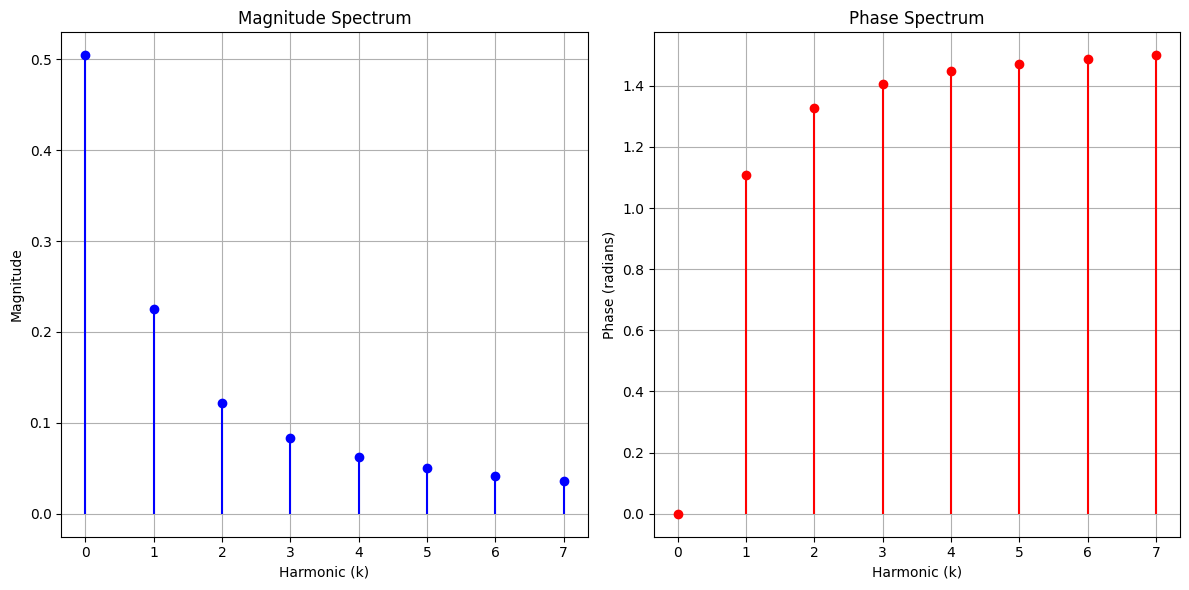

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the period and decay rate
T = np.pi  # Period of the function
decay_rate = 1/2  # Exponential decay rate

# Compute Fourier coefficients including DC component (k=0) and first 7 harmonics
k_values = np.arange(0, 8)  # Harmonics from k = 0 to k = 7

# Handle k=0 (DC) component separately and combine with other harmonics
a_0 = 2/np.pi * (1 - np.exp(-T * decay_rate))  # DC component
a_k = np.zeros(len(k_values))
b_k = np.zeros(len(k_values))

# Set DC component
a_k[0] = a_0
b_k[0] = 0  # No sine component for k=0

# Calculate coefficients for k > 0
k_nonzero = k_values[1:]
a_k[1:] = (2 * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k_nonzero**2))
b_k[1:] = (4 * k_nonzero * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k_nonzero**2))

# Compute magnitude spectrum
magnitude_spectrum = np.sqrt(a_k**2 + b_k**2)

# Compute phase spectrum (phase angle in radians)
# Handle k=0 case to avoid division by zero in arctan2
phase_spectrum = np.arctan2(b_k, a_k)

# Create figure
plt.figure(figsize=(12, 6))

# Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.stem(k_values, magnitude_spectrum, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.xlabel("Harmonic (k)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.grid(True)

# Phase Spectrum
plt.subplot(1, 2, 2)
plt.stem(k_values, phase_spectrum, basefmt=" ", linefmt="r-", markerfmt="ro")
plt.xlabel("Harmonic (k)")
plt.ylabel("Phase (radians)")
plt.title("Phase Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Fourier series approximation
def fourier_series_exp_decay(t, num_harmonics, T=np.pi, decay_rate=1/2):
    """
    Reconstructs the periodic exponentially decaying function using a finite number of harmonics.
    
    Parameters:
    - t: Time array
    - num_harmonics: Number of harmonics to include in the reconstruction
    - T: Period of the function (default is pi)
    - decay_rate: Exponential decay rate (default is 1/2)
    
    Returns:
    - Approximated signal x_t
    """
    x_t = np.zeros_like(t)  # Initialize reconstructed signal
    
    # Compute DC component (a_0)
    a_0 = (2/T) * (1 - np.exp(-T * decay_rate))
    x_t += a_0   # Include DC component
    
    # Compute and sum up harmonics
    for k in range(1, num_harmonics + 1):
        a_k = (2 * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k**2))
        b_k = (4 * k * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k**2))
        x_t += a_k * np.cos(2 * k * np.pi * t / T) + b_k * np.sin(2 * k * np.pi * t / T)

    return x_t

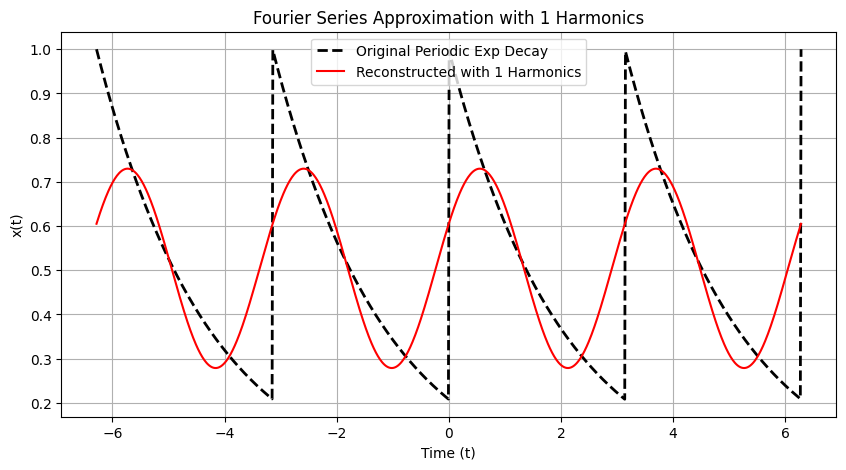

In [13]:
# User-defined parameters
num_harmonics =1
T = np.pi  # Period
t = np.linspace(-2*T, 2*T, 1000)  # Time range covering multiple periods

# Generate the reconstructed signal
x_t = fourier_series_exp_decay(t, num_harmonics, T)

# Plot the original function for comparison
original_signal = np.exp(-np.mod(t, T) / 2)  # Periodic exponential decay

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, original_signal, 'k--', label="Original Periodic Exp Decay", linewidth=2)
plt.plot(t, x_t, 'r', label=f"Reconstructed with {num_harmonics} Harmonics")
plt.xlabel("Time (t)")
plt.ylabel("x(t)")
plt.title(f"Fourier Series Approximation with {num_harmonics} Harmonics")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
k=2
0.504*(2/(1+16*k**2))
# 2
# 1+16n2

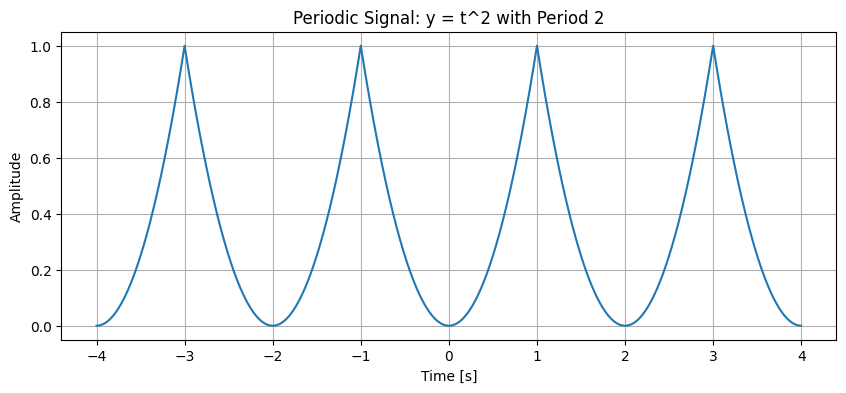

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the signal
period = 2  # Period of the signal
duration = 4  # Duration in seconds
sampling_rate = 1000  # Sampling rate in samples per second

# Time array
t = np.linspace(-duration, duration, int(sampling_rate * duration), endpoint=False)

# Signal generation using y = (t % period)^2
# Adjust the time to center the period around 0
signal = ((t + 1) % period - 1) ** 2

# Plotting the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Periodic Signal: y = t^2 with Period 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Fourier Series Derivation for \( x(t) = t^2 \) with Period \( T = 2 \)

The given periodic function is \( x(t) = t^2 \) in the interval \( -1 \leq t < 1 \), which repeats with a period of \( T = 2 \). We derive its Fourier series representation.

## **Step 1: Fourier Series Representation**
A periodic function with period \( T \) can be expanded in a Fourier series:

$$
x(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are:

$$
a_0 = \frac{1}{T} \int_{-T/2}^{T/2} x(t) dt
$$

$$
a_k = \frac{2}{T} \int_{-T/2}^{T/2} x(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

$$
b_k = \frac{2}{T} \int_{-T/2}^{T/2} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

Since \( x(t) = t^2 \) is an **even** function, all sine terms vanish:

$$
b_k = 0, \quad \text{for all } k
$$

Thus, the Fourier series consists only of cosine terms.

---

## **Step 2: Compute \( a_0 \) (DC Component)**
The DC component is:

$$
a_0 = \frac{1}{2} \int_{-1}^{1} t^2 dt
$$

Solving:

$$
a_0 = \frac{1}{2} \left[ \frac{t^3}{3} \right]_{-1}^{1}
$$

$$
a_0 = \frac{1}{2} \left( \frac{1}{3} - \left(-\frac{1}{3}\right) \right)
$$

$$
a_0 = \frac{1}{2} \times \frac{2}{3} = \frac{1}{3}
$$

---

## **Step 3: Compute \( a_k \)**
The general formula for \( a_k \) is:

$$
a_k = \frac{2}{2} \int_{-1}^{1} t^2 \cos(k\pi t) dt
$$

$$
a_k = \int_{-1}^{1} t^2 \cos(k\pi t) dt
$$

Using **integration by parts** or known integral formulas:

$$
\int t^2 \cos(At) dt = \frac{2A t \sin(At) + (A^2 t^2 - 2) \cos(At)}{A^3}
$$

Substituting \( A = k\pi \):

$$
a_k = \left[ \frac{2 k\pi t \sin(k\pi t) + (k^2 \pi^2 t^2 - 2) \cos(k\pi t)}{k^3 \pi^3} \right]_{-1}^{1}
$$

Since \( \sin(\pm k\pi) = 0 \) and \( \cos(\pm k\pi) = (-1)^k \), the expression simplifies to:

$$
a_k = \frac{2(-1)^k}{k^2 \pi^2}
$$

---

## **Step 4: Final Fourier Series**
Thus, the Fourier series expansion of \( x(t) = t^2 \) with period \( T = 2 \) is:

$$
x(t) = \frac{1}{3} + \sum_{k=1}^{\infty} \frac{2(-1)^k}{k^2 \pi^2} \cos(k\pi t)
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t) = t over the interval [-5, 5]

def f(t):
    return (t-1) % 2 -1

# Generate t values
t = np.linspace(-5, 5, 400)

# Compute f(t) values
f_t = f(t)

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(t, f_t, label='$f(t)$ going from -1 to 1 repeatedly')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.title('Plot of the function $f(t)$ going from -1 to 1 repeatedly over the interval $[-5, 5]$')
plt.legend()
plt.grid(True)
plt.show()


# Fourier Series Derivation for a Sawtooth Wave

The given function is a **sawtooth wave** that linearly increases from \( -1 \) to \( 1 \) over one period \( T = 2 \), then repeats. Mathematically, it can be expressed as:

$$
f(t) = t, \quad -1 \leq t < 1
$$

which extends periodically with period \( T = 2 \).

## **Step 1: Fourier Series Representation**
A periodic function with period \( T \) can be expanded in a Fourier series:

$$
f(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are given by:

$$
a_0 = \frac{1}{T} \int_{-T/2}^{T/2} f(t) dt
$$

$$
a_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

$$
b_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

---

## **Step 2: Compute \( a_0 \)**
Since the function is **odd**, its integral over one period is zero:

$$
a_0 = \frac{1}{2} \int_{-1}^{1} t dt
$$

$$
a_0 = \frac{1}{2} \left[ \frac{t^2}{2} \right]_{-1}^{1} = \frac{1}{2} \left( \frac{1}{2} - \frac{1}{2} \right) = 0
$$

Thus, there is **no DC component**.

---

## **Step 3: Compute \( a_k \)**
Since \( f(t) = t \) is **odd**, all cosine terms vanish:

$$
a_k = 0, \quad \text{for all } k
$$

---

## **Step 4: Compute \( b_k \)**
The sine coefficients are given by:

$$
b_k = \frac{2}{2} \int_{-1}^{1} t \sin(k\pi t) dt
$$

$$
b_k = \int_{-1}^{1} t \sin(k\pi t) dt
$$

Using **integration by parts**, let:

- \( u = t \)  → \( du = dt \)
- \( dv = \sin(k\pi t) dt \) → \( v = -\frac{\cos(k\pi t)}{k\pi} \)

Applying integration by parts:

$$
b_k = \left[ -\frac{t \cos(k\pi t)}{k\pi} \right]_{-1}^{1} + \int_{-1}^{1} \frac{\cos(k\pi t)}{k\pi} dt
$$

Since \( \cos(k\pi) = (-1)^k \):

$$
b_k = -\frac{1 \cdot (-1)^k - (-1 \cdot (-1)^k)}{k\pi} + \frac{1}{k\pi} \int_{-1}^{1} \cos(k\pi t) dt
$$

Since the integral of cosine over a symmetric range around zero is zero, we get:

$$
b_k = \frac{2 (-1)^{k+1}}{k\pi}
$$

---

## **Step 5: Final Fourier Series**
Thus, the Fourier series for the **sawtooth wave** is:

$$
f(t) = \sum_{k=1}^{\infty} \frac{2 (-1)^{k+1}}{k\pi} \sin(k\pi t)
$$

This series represents the given periodic function in terms of its frequency components.


# Fourier Series of a Triangular Wave

The given signal appears to be a periodic **triangular waveform**. To compute its Fourier series components, we follow these steps:

## **Step 1: Define the Signal**
The signal $x(t)$ has a **triangular shape** and is periodic. Assume:
- It has a **period** $T$.
- The **peak amplitude** is $A$.
- It has **odd symmetry**, meaning it consists of only sine terms in the Fourier series.

## **Step 2: Fourier Series Representation**
For an **odd-symmetric** periodic function, its Fourier series can be represented as:

$$
x(t) = \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t \right)
$$

where the sine coefficients are given by:

$$
b_k = \frac{2}{T} \int_{0}^{T} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

Since the function is **triangular**, we can use the known Fourier series for a symmetric **triangular wave** with period $T$:

$$
x(t) = \sum_{k=1, \text{odd}}^{\infty} \frac{8A}{\pi^2 k^2} \sin\left(\frac{2\pi k}{T} t\right)
$$

## **Step 3: Fourier Coefficients**
For a triangular waveform of period $T$:

$$
b_k = 
\begin{cases} 
\frac{8A}{\pi^2 k^2}, & k \text{ is odd} \\
0, & k \text{ is even}
\end{cases}
$$

## **Step 4: Interpreting the Result**
- Only **odd harmonics** appear in the Fourier series.
- The amplitudes **decay quadratically** as $1/k^2$, meaning that higher harmonics contribute less energy.
- The fundamental frequency is $f_0 = \frac{1}{T}$.

Thus, the Fourier series for the given periodic triangular waveform is:

$$
x(t) = \sum_{k=1,3,5,\dots}^{\infty} \frac{8A}{\pi^2 k^2} \sin\left(\frac{2\pi k}{T} t\right)
$$

This provides an analytical representation of the signal in terms of its frequency components.


# Fourier Series Derivation for a Sawtooth Wave

The given periodic signal is a **sawtooth wave** with period $T$ and peak amplitude $A$. We compute its Fourier series representation.

## **Step 1: Fourier Series Representation**
For an **odd-symmetric** periodic function, the Fourier series consists only of sine terms:

$$
x(t) = \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are given by:

$$
b_k = \frac{2}{T} \int_{0}^{T} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

## **Step 2: Define the Sawtooth Wave Function**
A sawtooth wave that linearly increases from $-A$ to $A$ over one period $T$ can be expressed as:

$$
x(t) = \frac{2A}{T} t, \quad -\frac{T}{2} \leq t < \frac{T}{2}
$$

This definition ensures that the function is **odd**, meaning it contains only sine terms.

## **Step 3: Compute $b_k$**
Using the formula:

$$
b_k = \frac{2}{T} \int_{-T/2}^{T/2} \frac{2A}{T} t \sin\left(\frac{2\pi k}{T} t\right) dt
$$

### **Step 3.1: Factor Out Constants**
Rewriting:

$$
b_k = \frac{4A}{T^2} \int_{-T/2}^{T/2} t \sin\left(\frac{2\pi k}{T} t\right) dt
$$

Let:

$$
I = \int_{-T/2}^{T/2} t \sin\left(\frac{2\pi k}{T} t\right) dt
$$

### **Step 3.2: Solve the Integral Using Integration by Parts**
Using **integration by parts**, where:

- $u = t$  → $du = dt$
- $dv = \sin\left(\frac{2\pi k}{T} t\right) dt$ → $v = -\frac{T}{2\pi k} \cos\left(\frac{2\pi k}{T} t\right)$

Applying integration by parts:

$$
I = \left[ -\frac{T}{2\pi k} t \cos\left(\frac{2\pi k}{T} t\right) \right]_{-T/2}^{T/2} + \int_{-T/2}^{T/2} \frac{T}{2\pi k} \cos\left(\frac{2\pi k}{T} t\right) dt
$$

Since $\cos(\pm \pi k) = (-1)^k$, the first term vanishes, leaving:

$$
I = \frac{T^2}{4\pi^2 k^2} \sin\left(\frac{2\pi k}{T} t\right) \Bigg|_{-T/2}^{T/2}
$$

Using $\sin(\pm \pi k) = 0$, we obtain:

$$
I = -\frac{T^2}{4\pi^2 k^2} \cdot 2 (-1)^k = \frac{T^2}{2\pi^2 k^2} (-1)^k
$$

### **Step 3.3: Compute $b_k$**
Substituting back:

$$
b_k = \frac{4}{T^2} \cdot \frac{T^2}{2\pi^2 k^2} (-1)^k
$$

Simplifying:

$$
b_k = \frac{2}{\pi k} (-1)^{k+1}
$$

## **Final Fourier Series Representation**
Thus, the Fourier series for the **sawtooth wave** is:

$$
x(t) = \sum_{k=1}^{\infty} \frac{2}{\pi k} (-1)^{k+1} \sin\left(\frac{2\pi k}{T} t\right)
$$


f

<!--
- Calculate \( a_n \):

$$
a_n = \frac{2}{2\pi} \int_{0}^{2\pi} e^{-t/2} \cos(n t) \, dt = \frac{1}{\pi} \int_{0}^{2\pi} e^{-t/2} \cos(n t) \, dt
$$

This integral can be solved using integration by parts or using a table of integrals.

- Calculate \( b_n \):

$$
b_n = \frac{2}{2\pi} \int_{0}^{2\pi} e^{-t/2} \sin(n t) \, dt = \frac{1}{\pi} \int_{0}^{2\pi} e^{-t/2} \sin(n t) \, dt
$$

This integral can also be solved using integration by parts or using a table of integrals.

5. **Construct the Fourier series:**

After calculating the coefficients \( a_n \) and \( b_n \), we can write the compact trigonometric Fourier series for the signal \( x(t) \).

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n t) + b_n \sin(n t) \right]
$$

Where $( a_0 = \frac{1 - e^{-\pi}}{\pi} )$ and the values of \( a_n \) and \( b_n \) are determined from the integrals. -->
